# SIMPLE FLOWER CLASSIFIER MIT PERZEPTRON

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

## PERZEPTRON

In [5]:
class Perceptron(object):

    def __init__(self, eta=0.01, n_iter=10):
        # eta: Lernrate 0 <= eta <= 1
        # n_iter: Anzahl Korrekturen am Modell (Epochen)
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):
        # Erstelle Modell aus
        # X = Alle Merkmalsausprägungen
        # y = Korrekte Klassen (-1, 1) der Merkmalsausprägungen
        self.w_ = np.zeros(1 + X.shape[1]) # Gewichtsvektor w_ (3 Gewichte)
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                # xi = Tatsächliche Merkmalsausprägungen
                # target = Tatsächliche Blütenklasse (setosa: -1, versicolor: +1)

                # Neue Gewichte werden berechnet: eta*(y - y^)*xi
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0) # Wenn Vorhersage nicht gestimmt hat (update != 0), errors+=1
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        # Übertragungsfunktion: Summe aus Gewichtsvektor w_ und Merkmalsausprägungsvektor X (Skalarprodukt)
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        # Aktivierungsfunktion: Wenn Übertragungsfunktion (net_input) >= 0.0, dann Aktivierungsfunktion = 1 
        # ansonsten Aktivierungsfunktion = -1
        return np.where(self.net_input(X) >= 0.0, 1, -1)

## PLOT ENTSCHEIDUNGSGRENZE

In [18]:
def plot_decision_regions(X, y, classifier, resolution=0.02):

    # Plotten der Entscheidungsgrenze
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # Plotten aller Objekte
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, label=cl)

## DATENSET LADEN

In [7]:
# Load/Print Dataset
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
print(df.tail())

       0    1    2    3               4
145  6.7  3.0  5.2  2.3  Iris-virginica
146  6.3  2.5  5.0  1.9  Iris-virginica
147  6.5  3.0  5.2  2.0  Iris-virginica
148  6.2  3.4  5.4  2.3  Iris-virginica
149  5.9  3.0  5.1  1.8  Iris-virginica


## DATEN VORBEREITUNG FÜR PERZEPTRON

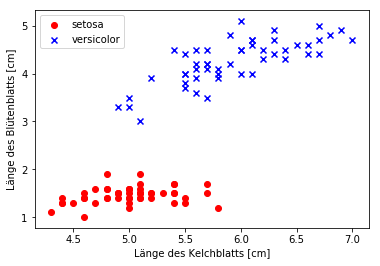

In [8]:
y = df.iloc[0:100, 4].values # Teile Datenset (erste 100 Werte) und erhalte 4. Spalte (Klasse)
y = np.where(y == 'Iris-setosa', -1, 1) # Setze Iris-setosa als Klasse -1 fest, alle anderen als 1
X = df.iloc[0:100, [0, 2]].values # Nehme erste 100 Merkmalsausprägungen
plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='setosa') # setosa ist in den ersten 50 datensätzen
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='x', label='versicolor') # versicolor ist in den zweiten 50 datensätzen
plt.xlabel('Länge des Kelchblatts [cm]')
plt.ylabel('Länge des Blütenblatts [cm]')
plt.legend(loc='upper left')
plt.show() # Zeige Diagramm

## PERZEPTRON ERSTELLEN UND MODELL LERNEN LASSEN

In [9]:
ppn = Perceptron(eta=0.1, n_iter=10) # Erstelle Perzeptron
ppn.fit(X, y) # Modell mittels Testdaten anlernen

## KLASSE VORHERSAGEN NACHDEM MODELL ANGELERNT WURDE

In [10]:
print(ppn.predict([6, 3]))

1


## FEHLER UND ANZAHL DER UPDATES

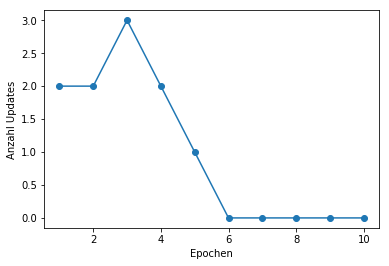

In [11]:
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochen')
plt.ylabel('Anzahl Updates')
plt.show()

## ENTSCHEIDUNGSGRENZE PLOTTEN

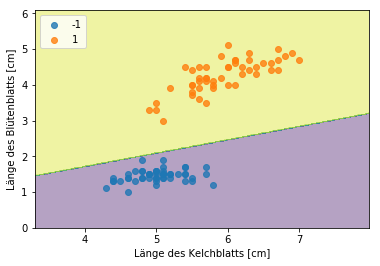

In [19]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('Länge des Kelchblatts [cm]')
plt.ylabel('Länge des Blütenblatts [cm]')
plt.legend(loc='upper left')
plt.show() # Zeige Diagramm